In [284]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from itertools import combinations
from scipy.stats import chi2_contingency


# Load Dataset


In [285]:
np.set_printoptions(precision=4, suppress=True)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

df = pd.read_csv('../data/OurLoanData.csv', low_memory=False)


# Refactor Categorical Columns


In [286]:
df.loc[df['Education'] == 1, 'Education'] = 'Primary'
df.loc[df['Education'] == 2, 'Education'] = 'Basic'
df.loc[df['Education'] == 3, 'Education'] = 'Vocational'
df.loc[df['Education'] == 4, 'Education'] = 'Secondary'
df.loc[df['Education'] == 5, 'Education'] = 'Higher'
df.loc[df['Education'] == -1.0, 'Education'] = np.nan
df.loc[df['Education'] == 0.0, 'Education'] = np.nan

df.loc[df['EmploymentStatus'] == 1, 'EmploymentStatus'] = 'Unemployed'
df.loc[df['EmploymentStatus'] == 2, 'EmploymentStatus'] = 'Partially employed'
df.loc[df['EmploymentStatus'] == 3, 'EmploymentStatus'] = 'Fully employed'
df.loc[df['EmploymentStatus'] == 4, 'EmploymentStatus'] = 'Self-employed'
df.loc[df['EmploymentStatus'] == 5, 'EmploymentStatus'] = 'Entrepreneur'
df.loc[df['EmploymentStatus'] == 6, 'EmploymentStatus'] = 'Retiree'
df.loc[df['EmploymentStatus'] == -1, 'EmploymentStatus'] = np.nan
df.loc[df['EmploymentStatus'] == 0, 'EmploymentStatus'] = np.nan

df.loc[df['Gender'] == 0.0, 'Gender'] = 'Male'
df.loc[df['Gender'] == 1.0, 'Gender'] = 'Female'
df.loc[df['Gender'] == 2.0, 'Gender'] = np.nan

df.loc[df['HomeOwnershipType'] == 0, 'HomeOwnershipType'] = 'Homeless'
df.loc[df['HomeOwnershipType'] == 1, 'HomeOwnershipType'] = 'Owner'
df.loc[df['HomeOwnershipType'] == 2, 'HomeOwnershipType'] = 'Living with parents'
df.loc[df['HomeOwnershipType'] == 3, 'HomeOwnershipType'] = 'Tenant, pre-furnished property'
df.loc[df['HomeOwnershipType'] == 4, 'HomeOwnershipType'] = 'Tenant, unfurnished property'
df.loc[df['HomeOwnershipType'] == 5, 'HomeOwnershipType'] = 'Council house'
df.loc[df['HomeOwnershipType'] == 6, 'HomeOwnershipType'] = 'Joint tenant'
df.loc[df['HomeOwnershipType'] == 7, 'HomeOwnershipType'] = 'Joint ownership'
df.loc[df['HomeOwnershipType'] == 8, 'HomeOwnershipType'] = 'Mortgage'
df.loc[df['HomeOwnershipType'] == 9, 'HomeOwnershipType'] = 'Owner with encumbrance'
df.loc[df['HomeOwnershipType'] == 10, 'HomeOwnershipType'] = 'Other'
df.loc[df['HomeOwnershipType'] == -1, 'HomeOwnershipType'] = np.nan

df.loc[df['MaritalStatus'] == -1, 'MaritalStatus'] = np.nan
df.loc[df['MaritalStatus'] == 0, 'MaritalStatus'] = np.nan
df.loc[df['MaritalStatus'] == 1, 'MaritalStatus'] = 'Married'
df.loc[df['MaritalStatus'] == 2, 'MaritalStatus'] = 'Cohabitant'
df.loc[df['MaritalStatus'] == 3, 'MaritalStatus'] = 'Single'
df.loc[df['MaritalStatus'] == 4, 'MaritalStatus'] = 'Divorced'
df.loc[df['MaritalStatus'] == 5, 'MaritalStatus'] = 'Widow'

df.loc[df['OccupationArea'] == 1, 'OccupationArea'] = 'Other'
df.loc[df['OccupationArea'] == 2, 'OccupationArea'] = 'Mining'
df.loc[df['OccupationArea'] == 3, 'OccupationArea'] = 'Processing'
df.loc[df['OccupationArea'] == 4, 'OccupationArea'] = 'Energy'
df.loc[df['OccupationArea'] == 5, 'OccupationArea'] = 'Utilities'
df.loc[df['OccupationArea'] == 6, 'OccupationArea'] = 'Construction'
df.loc[df['OccupationArea'] == 7, 'OccupationArea'] = 'Retail and wholesale'
df.loc[df['OccupationArea'] == 8, 'OccupationArea'] = 'Transport and warehousing'
df.loc[df['OccupationArea'] == 9, 'OccupationArea'] = 'Hospitality and catering'
df.loc[df['OccupationArea'] == 10, 'OccupationArea'] = 'Info and telecom'
df.loc[df['OccupationArea'] == 11, 'OccupationArea'] = 'Finance and insurance'
df.loc[df['OccupationArea'] == 12, 'OccupationArea'] = 'Real-estate'
df.loc[df['OccupationArea'] == 13, 'OccupationArea'] = 'Research'
df.loc[df['OccupationArea'] == 14, 'OccupationArea'] = 'Administrative'
df.loc[df['OccupationArea'] == 15, 'OccupationArea'] = 'Civil service and military'
df.loc[df['OccupationArea'] == 16, 'OccupationArea'] = 'Education'
df.loc[df['OccupationArea'] == 17, 'OccupationArea'] = 'Healthcare and social help'
df.loc[df['OccupationArea'] == 18, 'OccupationArea'] = 'Art and entertainment'
df.loc[df['OccupationArea'] == 19, 'OccupationArea'] = 'Agriculture, forestry and fishing'
df.loc[df['OccupationArea'] == -1.0, 'OccupationArea'] = np.nan
df.loc[df['OccupationArea'] == 0.0, 'OccupationArea'] = np.nan

df.loc[df['UseOfLoan'] == 0, 'UseOfLoan'] = 'Loan consolidation'
df.loc[df['UseOfLoan'] == 1, 'UseOfLoan'] = 'Real-estate'
df.loc[df['UseOfLoan'] == 2, 'UseOfLoan'] = 'Home improvement'
df.loc[df['UseOfLoan'] == 3, 'UseOfLoan'] = 'Business'
df.loc[df['UseOfLoan'] == 4, 'UseOfLoan'] = 'Education'
df.loc[df['UseOfLoan'] == 5, 'UseOfLoan'] = 'Travel'
df.loc[df['UseOfLoan'] == 6, 'UseOfLoan'] = 'Vehicle'
df.loc[df['UseOfLoan'] == 7, 'UseOfLoan'] = 'Other'
df.loc[df['UseOfLoan'] == 8, 'UseOfLoan'] = 'Health'
df.loc[df['UseOfLoan'] == 101, 'UseOfLoan'] = 'Working capital financing'
df.loc[df['UseOfLoan'] == 102, 'UseOfLoan'] = 'Purchase of machinery equipment'
df.loc[df['UseOfLoan'] == 104, 'UseOfLoan'] = 'Accounts receivable financing'
df.loc[df['UseOfLoan'] == 106, 'UseOfLoan'] = 'Construction finance'
df.loc[df['UseOfLoan'] == 107, 'UseOfLoan'] = 'Acquisition of stocks'
df.loc[df['UseOfLoan'] == 108, 'UseOfLoan'] = 'Acquisition of real estate'
df.loc[df['UseOfLoan'] == 110, 'UseOfLoan'] = 'Other business'
df.loc[df['UseOfLoan'] == -1, 'UseOfLoan'] = np.nan

C:\Users\jzilt\AppData\Local\Temp\ipykernel_11520\3601212905.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Primary' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['Education'] == 1, 'Education'] = 'Primary'
C:\Users\jzilt\AppData\Local\Temp\ipykernel_11520\3601212905.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Unemployed' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['EmploymentStatus'] == 1, 'EmploymentStatus'] = 'Unemployed'
C:\Users\jzilt\AppData\Local\Temp\ipykernel_11520\3601212905.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Male' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['Gender']


# Feature Engineering


In [287]:
#Education
df.loc[df['Education'] == 'Primary', 'Education'] = 'Basic'


#EmploymentStatus
df.loc[df['EmploymentStatus'] == 'Retiree', 'EmploymentStatus'] = 'Unemployed'

df.loc[df['EmploymentStatus'] == 'Fully employed', 'EmploymentStatus'] = 'Employed'
df.loc[df['EmploymentStatus'] == 'Partially employed', 'EmploymentStatus'] = 'Employed'

df.loc[df['EmploymentStatus'] == 'Entrepreneur', 'EmploymentStatus'] = 'Self-employed'


#HomeOwnershipType
df.loc[df['HomeOwnershipType'] == 'Joint ownership', 'HomeOwnershipType'] = 'Owner'

df.loc[df['HomeOwnershipType'] == 'Tenant, pre-furnished property', 'HomeOwnershipType'] = 'Tenant'
df.loc[df['HomeOwnershipType'] == 'Tenant, unfurnished property', 'HomeOwnershipType'] = 'Tenant'
df.loc[df['HomeOwnershipType'] == 'Mortgage', 'HomeOwnershipType'] = 'Tenant'

df.loc[df['HomeOwnershipType'] == 'Homeless', 'HomeOwnershipType'] = 'Other'
df.loc[df['HomeOwnershipType'] == 'Living with parents', 'HomeOwnershipType'] = 'Other'
df.loc[df['HomeOwnershipType'] == 'Council house', 'HomeOwnershipType'] = 'Other'
df.loc[df['HomeOwnershipType'] == 'Joint tenant', 'HomeOwnershipType'] = 'Other'
df.loc[df['HomeOwnershipType'] == 'Owner with encumbrance', 'HomeOwnershipType'] = 'Other'


#MaritalStatus
df.loc[df['MaritalStatus'] == 'Married', 'MaritalStatus'] = 'Cohabitant'

df.loc[df['MaritalStatus'] == 'Divorced', 'MaritalStatus'] = 'Single'
df.loc[df['MaritalStatus'] == 'Widow', 'MaritalStatus'] = 'Single'


#OccupationArea
df.loc[df['OccupationArea'] == 'Mining', 'OccupationArea'] = 'Industry'
df.loc[df['OccupationArea'] == 'Processing', 'OccupationArea'] = 'Industry'
df.loc[df['OccupationArea'] == 'Energy', 'OccupationArea'] = 'Industry'
df.loc[df['OccupationArea'] == 'Utilities', 'OccupationArea'] = 'Industry'
df.loc[df['OccupationArea'] == 'Construction', 'OccupationArea'] = 'Industry'
df.loc[df['OccupationArea'] == 'Agriculture, forestry and fishing', 'OccupationArea'] = 'Industry'

df.loc[df['OccupationArea'] == 'Retail and wholesale', 'OccupationArea'] = 'Commerce'
df.loc[df['OccupationArea'] == 'Hospitality and catering', 'OccupationArea'] = 'Commerce'

df.loc[df['OccupationArea'] == 'Transport and warehousing', 'OccupationArea'] = 'Service'
df.loc[df['OccupationArea'] == 'Info and telecom', 'OccupationArea'] = 'Service'
df.loc[df['OccupationArea'] == 'Finance and insurance', 'OccupationArea'] = 'Service'
df.loc[df['OccupationArea'] == 'Real-estate', 'OccupationArea'] = 'Service'
df.loc[df['OccupationArea'] == 'Research', 'OccupationArea'] = 'Service'
df.loc[df['OccupationArea'] == 'Administrative', 'OccupationArea'] = 'Service'
df.loc[df['OccupationArea'] == 'Civil service and military', 'OccupationArea'] = 'Service'
df.loc[df['OccupationArea'] == 'Education', 'OccupationArea'] = 'Service'
df.loc[df['OccupationArea'] == 'Healthcare and social help', 'OccupationArea'] = 'Service'

df.loc[df['OccupationArea'] == 'Art and entertainment', 'OccupationArea'] = 'Other'


#UseOfLoan
df.loc[df['UseOfLoan'] == 'Loan consolidation', 'UseOfLoan'] = 'Financial'
df.loc[df['UseOfLoan'] == 'Real-estate', 'UseOfLoan'] = 'Financial'
df.loc[df['UseOfLoan'] == 'Home improvement', 'UseOfLoan'] = 'Financial'
df.loc[df['UseOfLoan'] == 'Business', 'UseOfLoan'] = 'Financial'

df.loc[df['UseOfLoan'] == 'Education', 'UseOfLoan'] = 'Personal'
df.loc[df['UseOfLoan'] == 'Travel', 'UseOfLoan'] = 'Personal'
df.loc[df['UseOfLoan'] == 'Vehicle', 'UseOfLoan'] = 'Personal'
df.loc[df['UseOfLoan'] == 'Other', 'UseOfLoan'] = 'Personal'
df.loc[df['UseOfLoan'] == 'Health', 'UseOfLoan'] = 'Personal'

df.loc[df['UseOfLoan'] == 'Working capital financing', 'UseOfLoan'] = 'Business'
df.loc[df['UseOfLoan'] == 'Purchase of machinery equipment', 'UseOfLoan'] = 'Business'
df.loc[df['UseOfLoan'] == 'Accounts receivable financing', 'UseOfLoan'] = 'Business'
df.loc[df['UseOfLoan'] == 'Construction finance', 'UseOfLoan'] = 'Business'
df.loc[df['UseOfLoan'] == 'Acquisition of stocks', 'UseOfLoan'] = 'Business'
df.loc[df['UseOfLoan'] == 'Acquisition of real estate', 'UseOfLoan'] = 'Business'
df.loc[df['UseOfLoan'] == 'Other business', 'UseOfLoan'] = 'Business'

#WorkExperience
df.loc[df['WorkExperience'] == 'LessThan2Years', 'WorkExperience'] = 'LessThan5Years'
df.loc[df['WorkExperience'] == '2To5Years', 'WorkExperience'] = 'LessThan5Years'

df.loc[df['WorkExperience'] == '5To10Years', 'WorkExperience'] = '5To15Years'
df.loc[df['WorkExperience'] == '10To15Years', 'WorkExperience'] = '5To15Years'

df.loc[df['WorkExperience'] == '15To25Years', 'WorkExperience'] = 'MoreThan15Years'
df.loc[df['WorkExperience'] == 'MoreThan25Years', 'WorkExperience'] = 'MoreThan15Years'


#EmploymentDurationCurrentEmployer
df.loc[df['EmploymentDurationCurrentEmployer'] == 'TrialPeriod', 'EmploymentDurationCurrentEmployer'] = 'LessThan3Years'
df.loc[df['EmploymentDurationCurrentEmployer'] == 'UpTo1Year', 'EmploymentDurationCurrentEmployer'] = 'LessThan3Years'
df.loc[df['EmploymentDurationCurrentEmployer'] == 'UpTo2Years', 'EmploymentDurationCurrentEmployer'] = 'LessThan3Years'
df.loc[df['EmploymentDurationCurrentEmployer'] == 'UpTo3Years', 'EmploymentDurationCurrentEmployer'] = 'LessThan3Years'

df.loc[df['EmploymentDurationCurrentEmployer'] == 'UpTo4Years', 'EmploymentDurationCurrentEmployer'] = '3To5Years'
df.loc[df['EmploymentDurationCurrentEmployer'] == 'UpTo5Years', 'EmploymentDurationCurrentEmployer'] = '3To5Years'


#NrOfDependants
df.loc[df['NrOfDependants'] == '10Plus', 'NrOfDependants'] = 10
df['NrOfDependants'] = df['NrOfDependants'].astype(float)


# Divide Categorical And Numerical Columns


In [288]:
numerical_cols=[col for col in df.columns if df[col].dtype!=object]
categorical_cols=[col for col in df.columns if df[col].dtype==object]

df[categorical_cols][df[categorical_cols].isna().any(axis=1)]

,Country,Education,EmploymentDurationCurrentEmployer,EmploymentStatus,Gender,HomeOwnershipType,MaritalStatus,OccupationArea,UseOfLoan,WorkExperience
586,ES,Higher,MoreThan5Years,Employed,NaN,Other,Single,Service,Financial,MoreThan15Years
724,ES,Higher,MoreThan5Years,Employed,NaN,Tenant,Single,Commerce,Personal,MoreThan15Years
765,ES,Secondary,MoreThan5Years,Employed,NaN,Tenant,Cohabitant,Other,Financial,5To15Years
774,ES,Higher,MoreThan5Years,Employed,NaN,Other,Cohabitant,Service,Personal,MoreThan15Years
5271,ES,Higher,LessThan3Years,Employed,NaN,Owner,Cohabitant,Service,Personal,LessThan5Years
...,...,...,...,...,...,...,...,...,...,...
34193,ES,Higher,LessThan3Years,Employed,NaN,Tenant,Single,Service,Financial,LessThan5Years
34195,ES,Higher,LessThan3Years,Employed,NaN,Tenant,Cohabitant,Service,Financial,MoreThan15Years
34196,ES,Higher,LessThan3Years,Employed,NaN,Other,Single,Other,Financial,5To15Years
34197,ES,Higher,LessThan3Years,Employed,NaN,Other,Single,Other,Personal,LessThan5Years


# Replace NaN Values

In [289]:
gender_count = df.groupby(['Gender']).size()
gender_count["Female"]
filled_count = gender_count[0] + gender_count[1]
gender_prob = gender_count/filled_count
gender_prob

C:\Users\jzilt\AppData\Local\Temp\ipykernel_11520\14313259.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  filled_count = gender_count[0] + gender_count[1]


Gender
Female   0.4376
Male     0.5624
dtype: float64

In [290]:
missing_indices = df[df['Gender'].isnull()].index
unique_categories = ['Male', 'Female']

df.loc[missing_indices, 'Gender'] = np.random.choice(unique_categories, len(missing_indices), p=[gender_prob[1], gender_prob[0]])

C:\Users\jzilt\AppData\Local\Temp\ipykernel_11520\2862718217.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df.loc[missing_indices, 'Gender'] = np.random.choice(unique_categories, len(missing_indices), p=[gender_prob[1], gender_prob[0]])



# Correlation Matrix Before Feature Selection


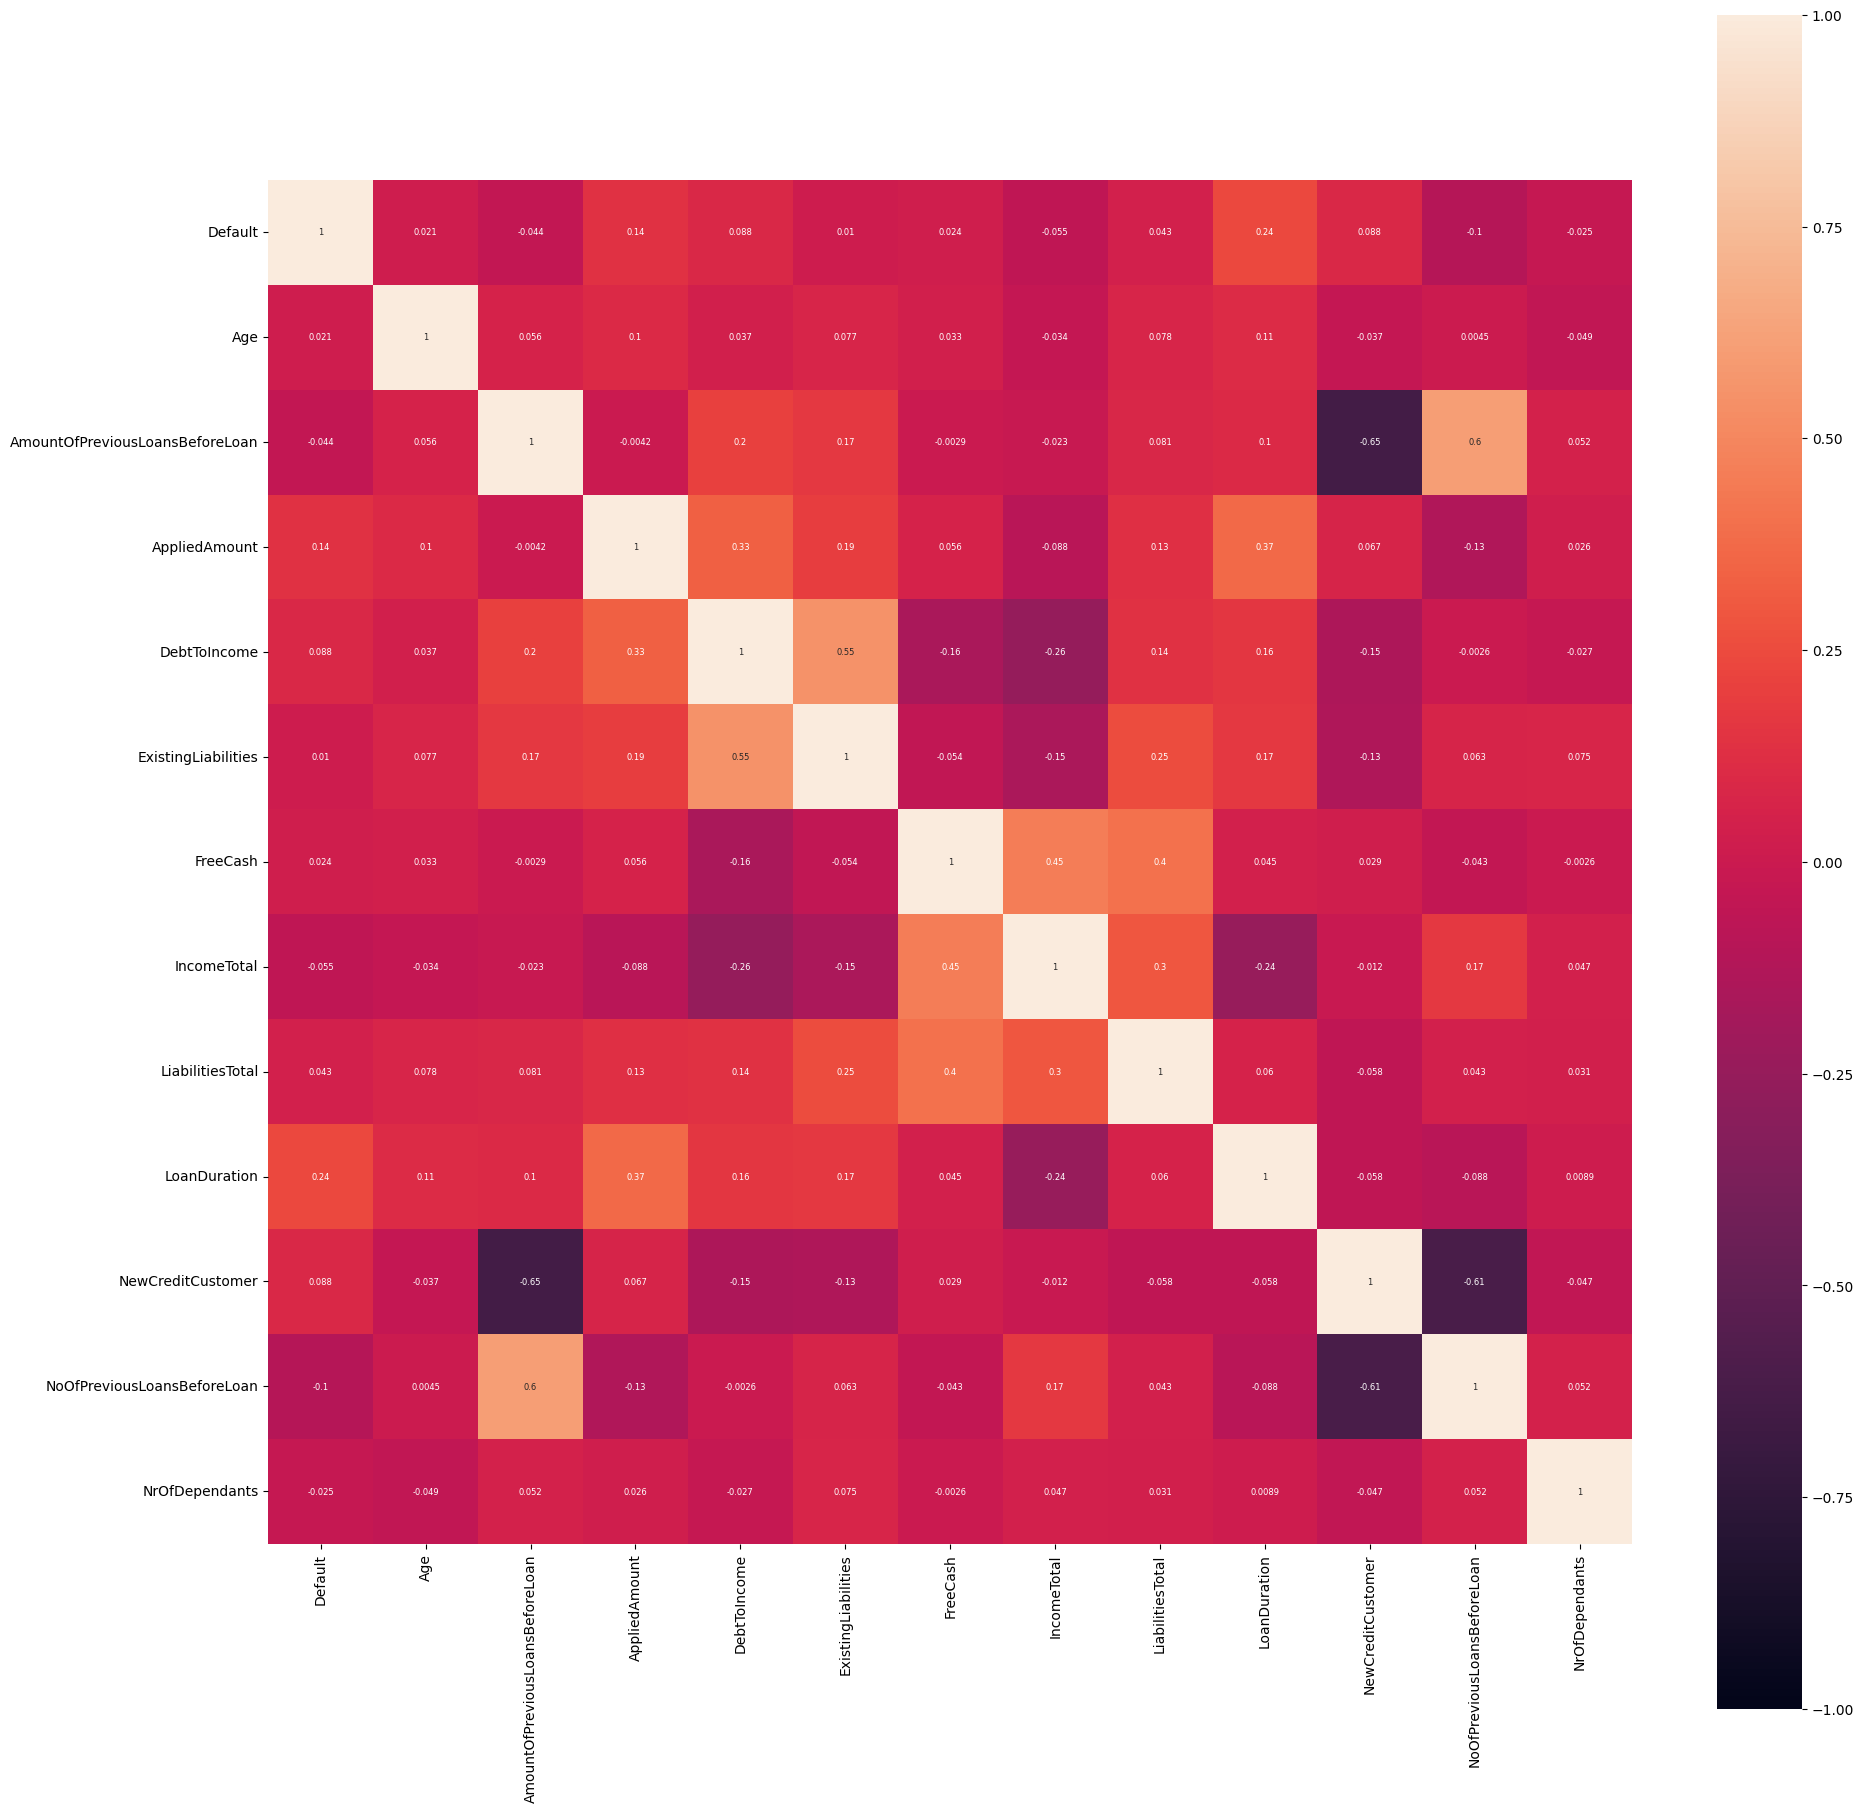

In [291]:
plt.figure(figsize=(22,22))

correlation_matrix = df[numerical_cols].corr()
svm = sns.heatmap(correlation_matrix, annot=True, annot_kws={'size': 6}, vmin=-1, vmax=1, square=True)
# svm.get_figure().savefig('../images/CorrelationMatrix.png', dpi=400)


# Correlation Matrix After Feature Selection


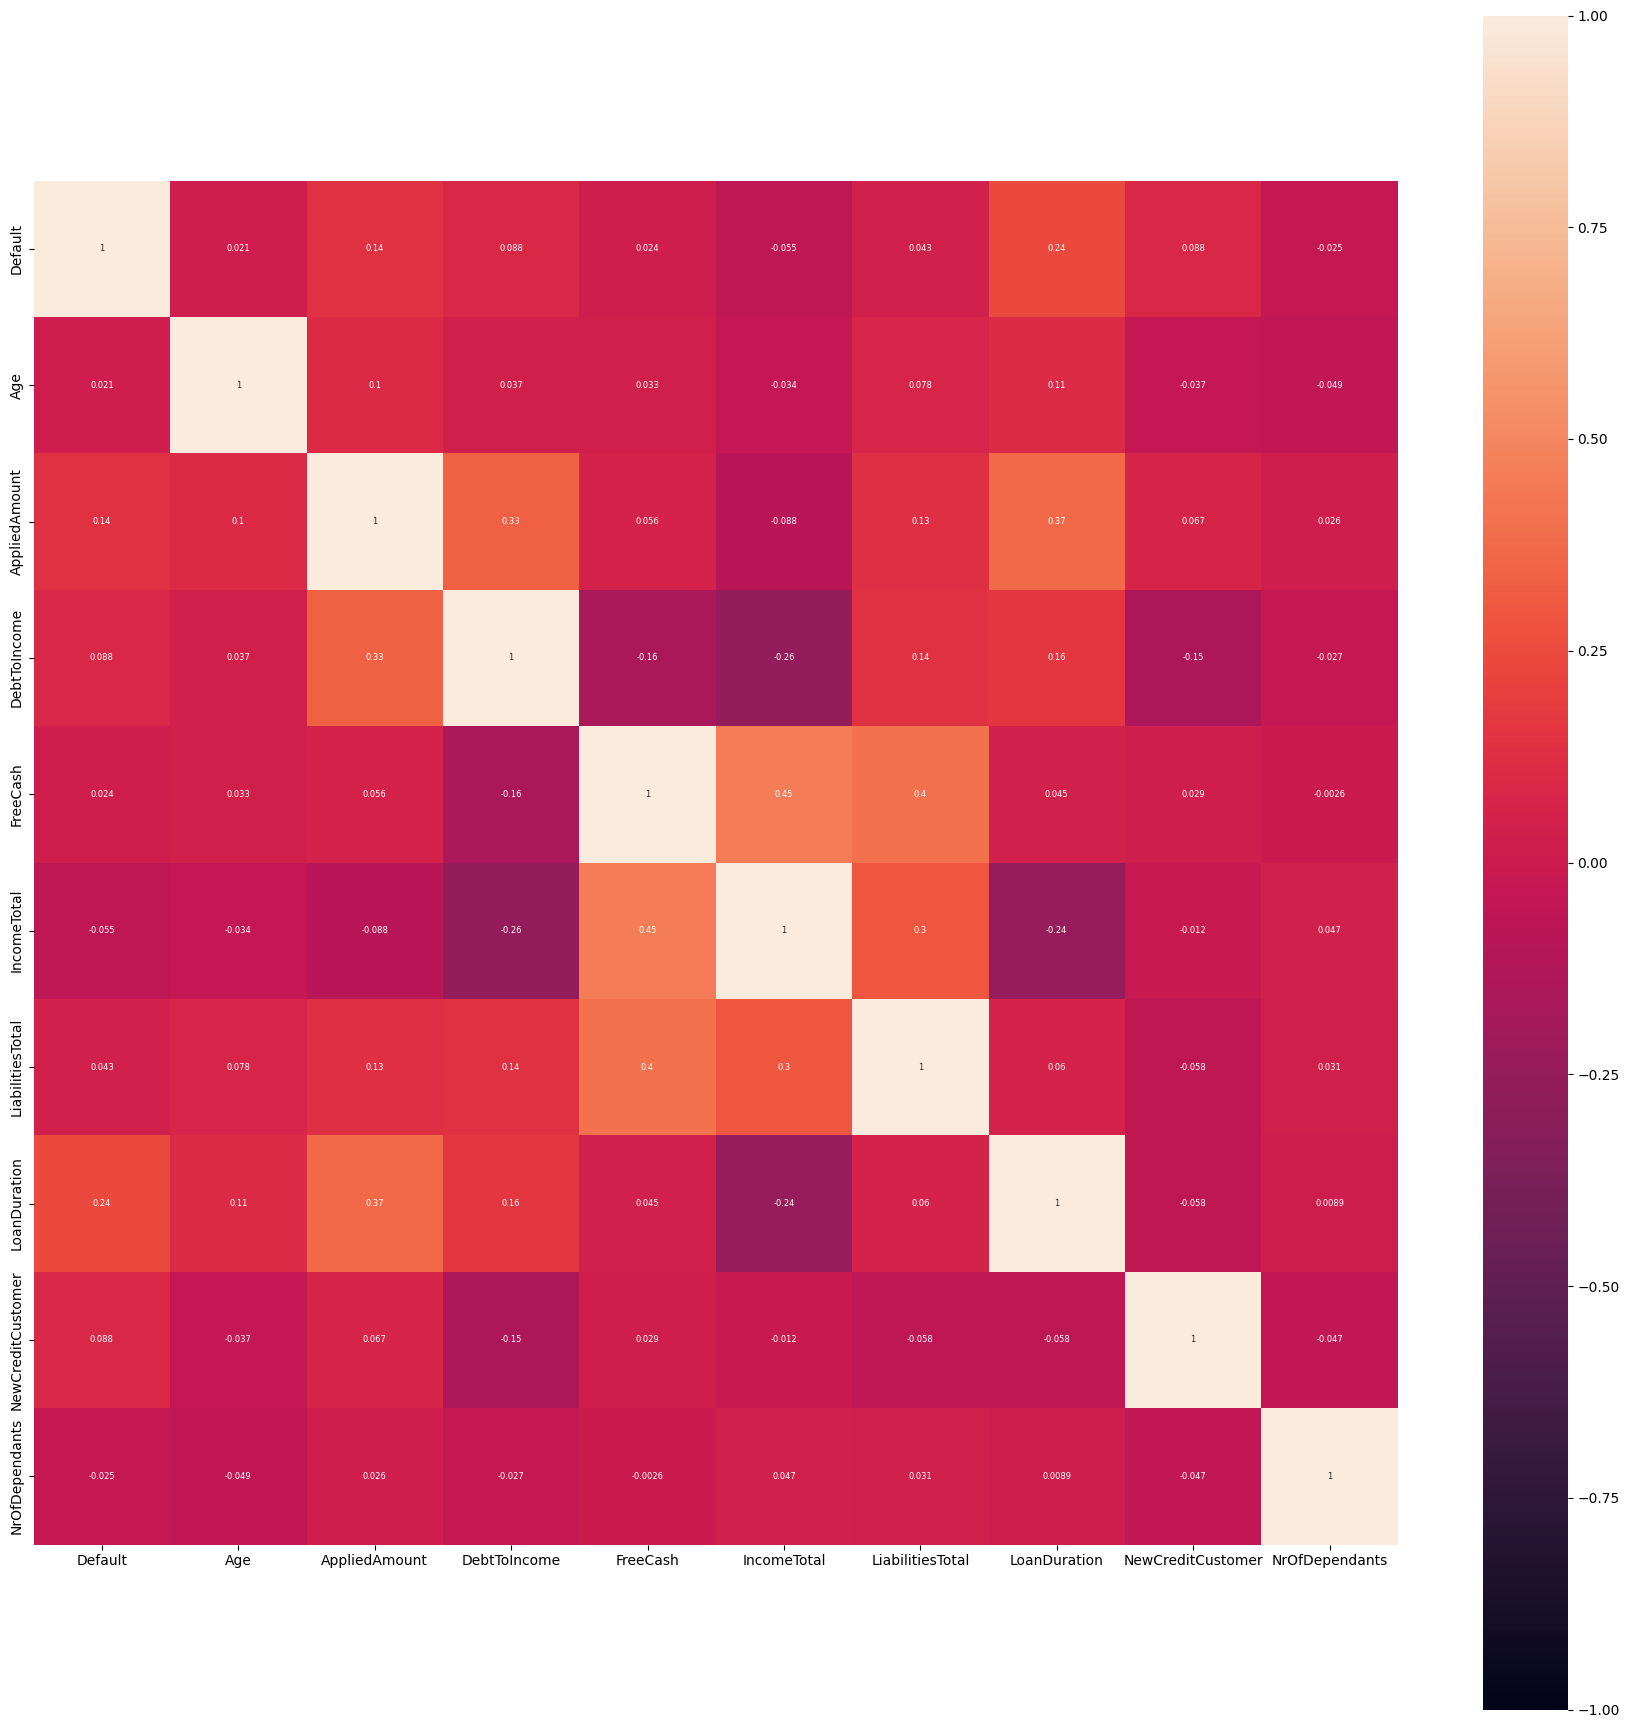

In [292]:
plt.figure(figsize=(22,22))

numerical_cols.remove('NoOfPreviousLoansBeforeLoan')
numerical_cols.remove('AmountOfPreviousLoansBeforeLoan')
numerical_cols.remove('ExistingLiabilities')

correlation_matrix = df[numerical_cols].corr()
svm = sns.heatmap(correlation_matrix, annot=True, annot_kws={'size': 6}, vmin=-1, vmax=1, square=True)
# svm.get_figure().savefig('../images/CorrelationMatrixProcessed.png', dpi=400)


# Chi-squared Test For Categorical Columns


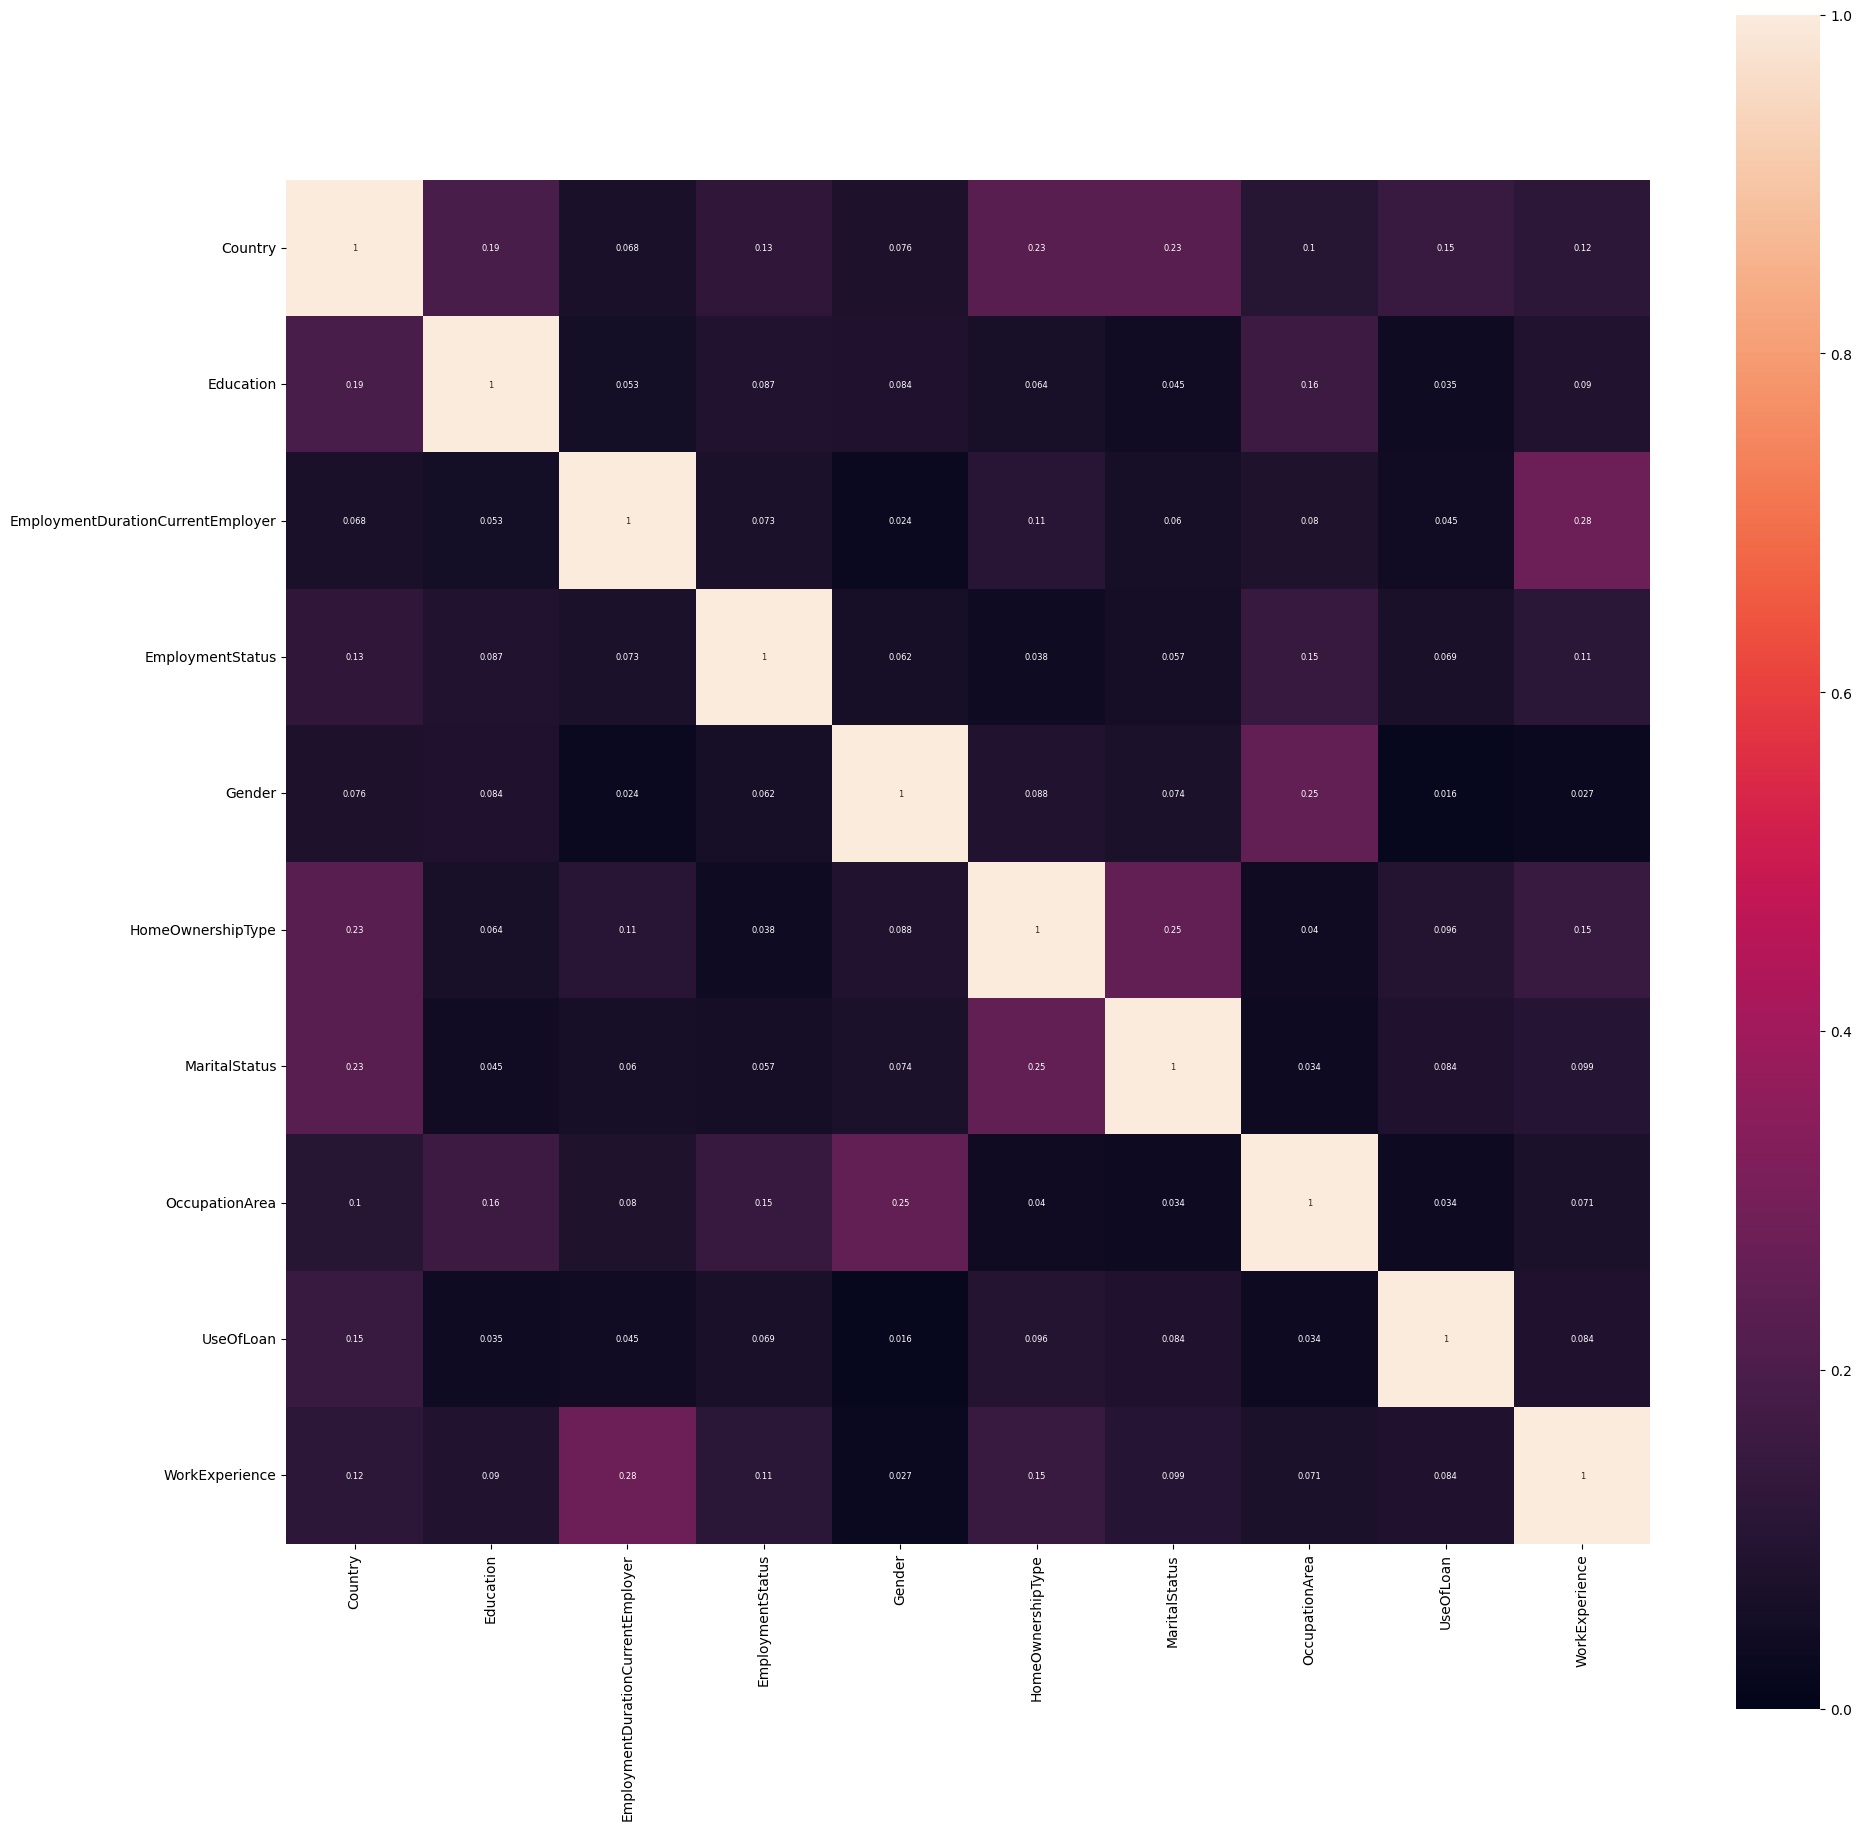

In [293]:
chi_squared_matrix = pd.DataFrame(columns=categorical_cols, index=categorical_cols)

variable_pairs = list(combinations(df[categorical_cols].columns, 2))

chi_square_results = pd.DataFrame(index=[f"{pair[0]} vs {pair[1]}" for pair in variable_pairs], columns=['Chi2', 'P-value', 'DF', 'Cramer\'s V'])

for pair in variable_pairs:
    contingency_table = pd.crosstab(df[categorical_cols][pair[0]], df[categorical_cols][pair[1]])
    chi2, p_value, DF, _ = chi2_contingency(contingency_table)
    chi_square_results.loc[f"{pair[0]} vs {pair[1]}", 'Chi2'] = chi2
    chi_square_results.loc[f"{pair[0]} vs {pair[1]}", 'P-value'] = p_value
    chi_square_results.loc[f"{pair[0]} vs {pair[1]}", 'DF'] = DF
    
    n = contingency_table.sum().sum()
    phi2 = chi2 / n
    r, k = contingency_table.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    chi_square_results.loc[f"{pair[0]} vs {pair[1]}", 'Cramer\'s V'] = np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
    
    chi_squared_matrix.loc[pair[0],pair[1]] = np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
    chi_squared_matrix.loc[pair[1],pair[0]] = np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

plt.figure(figsize=(22,22))
chi_squared_matrix.fillna(1, inplace=True)
cramers_v = sns.heatmap(chi_squared_matrix, annot=True, annot_kws={'size': 6}, vmin=0, vmax=1, square=True)
# cramers_v.get_figure().savefig('../images/CramersV.png', dpi=400)


# Export to CSV File


Cathegorical values not transformed.

In [294]:
df = df.drop(columns=['NoOfPreviousLoansBeforeLoan', 'AmountOfPreviousLoansBeforeLoan', 'ExistingLiabilities'])
df.to_csv('../data/ReducedLoanData.csv', index=False)

### Cathegorical transformation

In [295]:
categorical_cols=[col for col in df.columns if df[col].dtype==object]
df.shape

(34745, 20)

In [296]:
df.loc[df['Default'] == True, "Default"] = 1
df.loc[df['Default'] == False, "Default"] = 0
df.loc[df['NewCreditCustomer'] == False, "NewCreditCustomer"] = 0
df.loc[df['NewCreditCustomer'] == True, "NewCreditCustomer"] = 1
country = pd.get_dummies(df["Country"], drop_first=True, dtype=int)
education = pd.get_dummies(df["Education"], drop_first=True, dtype=int)
edce = pd.get_dummies(df["EmploymentDurationCurrentEmployer"], drop_first=True, dtype=int)
empl_status = pd.get_dummies(df["EmploymentStatus"], drop_first=True, dtype=int)
gender = pd.get_dummies(df["Gender"], drop_first=True, dtype=int)
ho_type = pd.get_dummies(df["HomeOwnershipType"], drop_first=True, dtype=int)
marital_status = pd.get_dummies(df["MaritalStatus"], drop_first=True, dtype=int)
opuc_area = pd.get_dummies(df["OccupationArea"], drop_first=True, dtype=int)
use_of_loan = pd.get_dummies(df["UseOfLoan"], drop_first=True, dtype=int)
work_exp = pd.get_dummies(df["WorkExperience"], drop_first=True, dtype=int)

C:\Users\jzilt\AppData\Local\Temp\ipykernel_11520\2847763717.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.loc[df['Default'] == True, "Default"] = 1
C:\Users\jzilt\AppData\Local\Temp\ipykernel_11520\2847763717.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.loc[df['NewCreditCustomer'] == False, "NewCreditCustomer"] = 0


Drop columns holding cathegorical or boolean values.

In [297]:
df.drop(categorical_cols, axis=1, inplace=True)
df.shape

(34745, 10)

Add newly created columns.

In [298]:
df = pd.concat([df, country, education, edce, empl_status, gender, ho_type, marital_status, opuc_area, use_of_loan, work_exp], axis=1)
df.shape

(34745, 30)

In [299]:
df.to_csv('../data/ReducedLoanData_NoCathegory.csv', index=False)

### Log values with high variance

In [300]:
df["Age"] = np.log(df["Age"] + 1)
df['AppliedAmount'] = np.log10(df['AppliedAmount'] + 1)
df['DebtToIncome'] = np.log(df['DebtToIncome'] + 1)
df['IncomeTotal'] = np.log10(df['IncomeTotal'] + 1)
df['FreeCash'] = np.log10(df['FreeCash'] + 1 + np.abs(df["FreeCash"].min()))
df['LiabilitiesTotal'] = np.log10(df['LiabilitiesTotal'] + 1)

In [302]:
df.to_csv('../data/ReducedLoanData_NoCathegory_Log.csv', index=False)